# Task 1 : Perform Exploratory Data Analysis (EDA)

In [1]:
import sys
from pathlib import Path

# Add the project root directory to sys.path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


In [2]:
# import modules
from src.data_loader import DataLoader
from src.eda.descriptive_stats import DescriptiveStats


## Load Dataset

In [3]:
#load data
data_loader = DataLoader("../data/raw_analyst_ratings/raw_analyst_ratings.csv");
df = data_loader.load_data()
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher date  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights  NaT   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights  NaT   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin  NaT   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin  NaT   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer  NaT   

  stock  
0     A  
1     A  
2     A  
3     A  
4     A  


## Descriptive Statistics

### Basic Statistics

In [4]:
# get descriptive statistics
descriptive_stats = DescriptiveStats(df)
descriptive_stats.get_descriptive_stats()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [5]:
# get missing values
descriptive_stats.get_missing_values()

Unnamed: 0        0
headline          0
url               0
publisher         0
date          55987
stock             0
dtype: int64

In [6]:
# get unique values
descriptive_stats.get_unique_values()

Unnamed: 0    1407328
headline       845770
url            883429
publisher        1034
date             3946
stock            6204
dtype: int64

In [7]:
# obtain basic statistics for each column
print("Headline:", descriptive_stats.get_text_length_stats("headline"))
print("-----------------------------------------------------------------------------")
print("URL:", descriptive_stats.get_text_length_stats("url"))
print("-----------------------------------------------------------------------------")
print("Publisher:", descriptive_stats.get_text_length_stats("publisher"))
print("-----------------------------------------------------------------------------")
print("Stock:", descriptive_stats.get_text_length_stats("stock"))

Headline: count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64
-----------------------------------------------------------------------------
URL: count    1.407328e+06
mean     1.105045e+02
std      1.916913e+01
min      3.300000e+01
25%      9.400000e+01
50%      1.150000e+02
75%      1.250000e+02
max      1.620000e+02
Name: url, dtype: float64
-----------------------------------------------------------------------------
Publisher: count    1.407328e+06
mean     1.277136e+01
std      2.701927e+00
min      3.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.400000e+01
max      4.600000e+01
Name: publisher, dtype: float64
-----------------------------------------------------------------------------
Stock: count    1.407328e+06
mean     3.344890e+00
std      6.688505e-01
min      1.000000e+00
25%      3.000000e+00
50%   

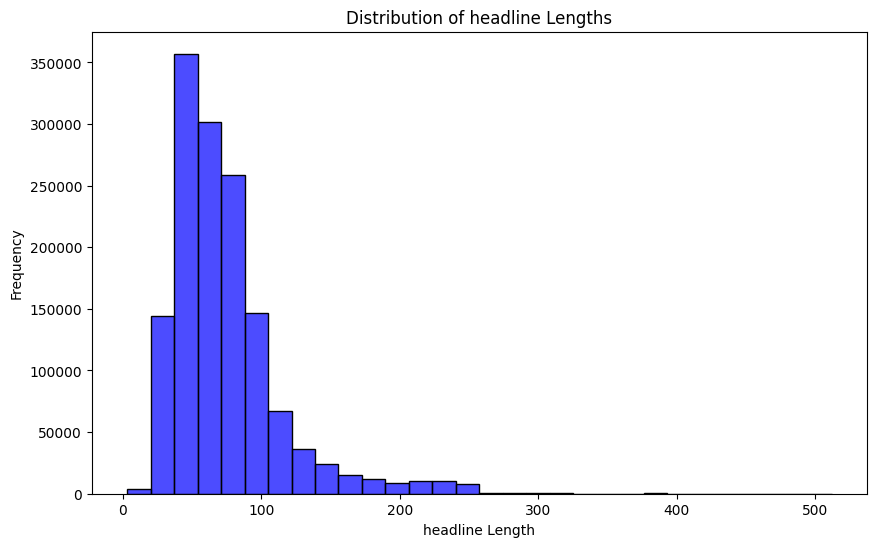

In [8]:
# visualize the distribution of headline lengths
descriptive_stats.plot_text_length_distribution("headline")

### Count the number of articles per publisher to identify which publishers are most active. 

In [9]:
# Count the number of articles per publisher to identify which publishers are most active.
descriptive_stats.get_articles_per_publisher('publisher')

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

''' Paul Quintaro is the most active publisher with 228373 articles. '''

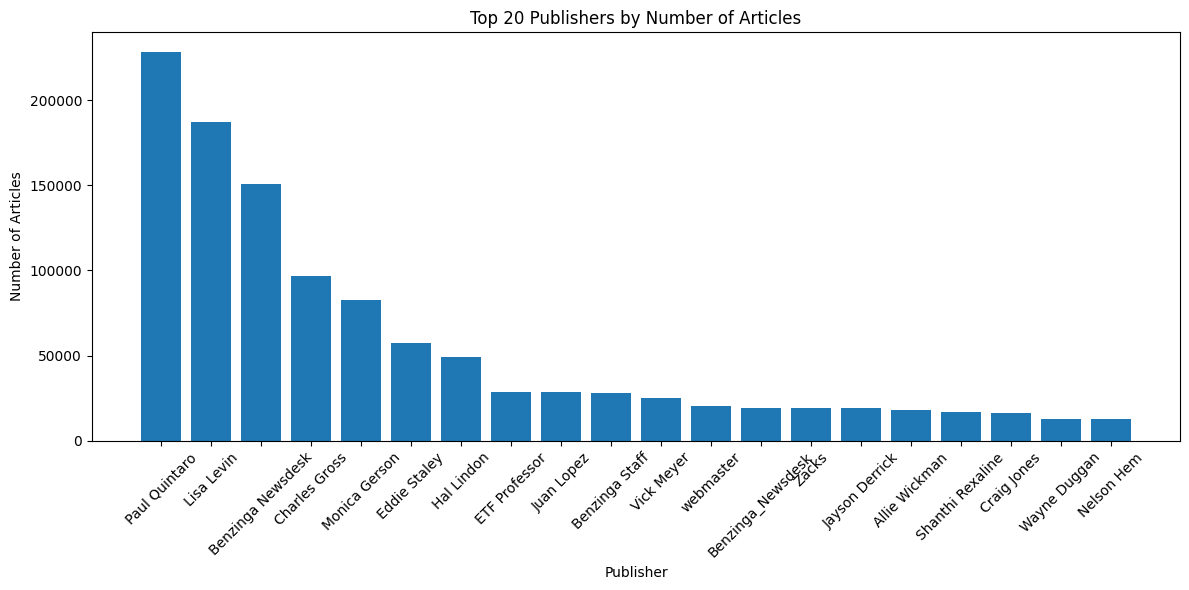

In [10]:
# Visualize the number of articles per publisher
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
top_df = descriptive_stats.get_articles_per_publisher('publisher').nlargest(20)
plt.bar(top_df.index, top_df.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Top 20 Publishers by Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()

### publication trends over time
Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

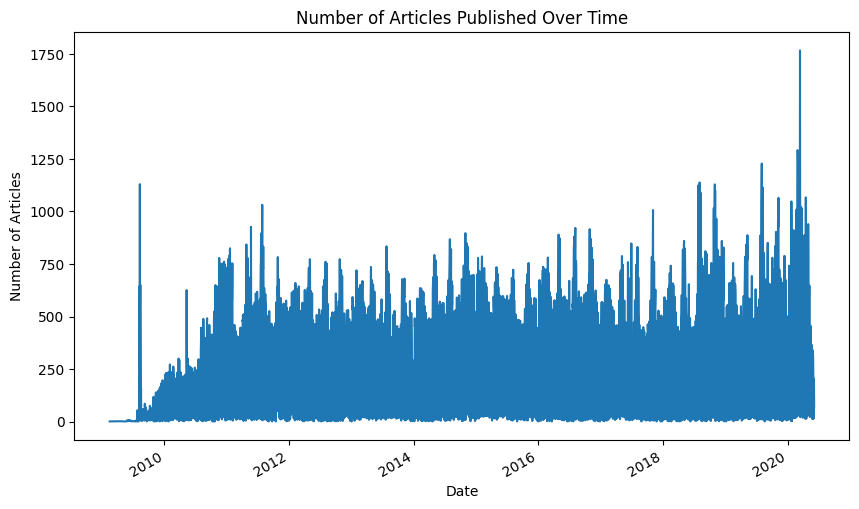

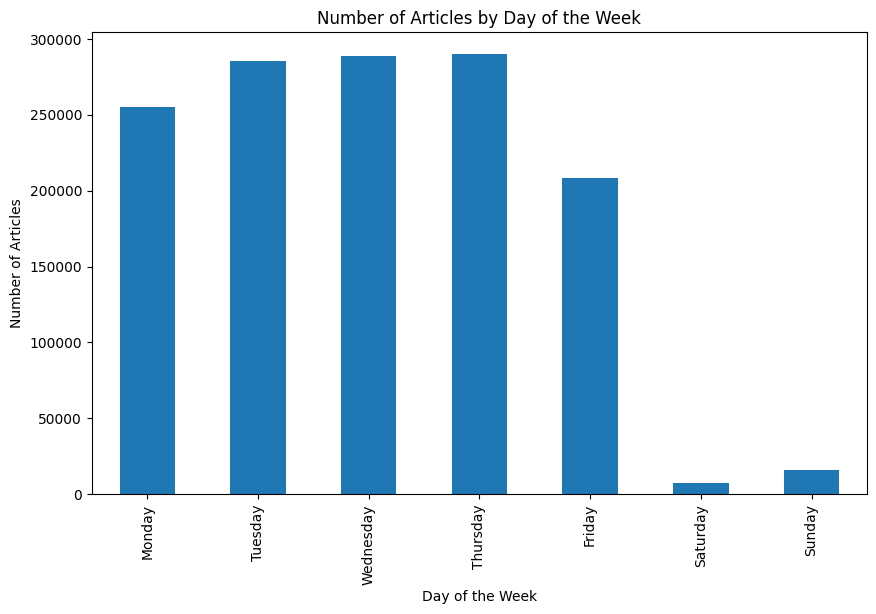

In [11]:
# Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
descriptive_stats.get_publication_date_trends('date')
# Visualize the number of articles by day of the week
descriptive_stats.plot_publication_weekly_trends('date')

## Text Analysis (Topic Modeling)

In [13]:
# import the module for text analysis
from src.eda.text_analysis import TextAnalysis


In [15]:
# initialize the TextAnalysis class
text_analyzer = TextAnalysis(df)

In [16]:
# perform sentiment analysis on the 'headline' column
df['sentiment_score'], df['sentiment'] = zip(*df['headline'].apply(text_analyzer.analyze_sentiment))
print(df[['headline', 'sentiment_score', 'sentiment']].head())

                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4  Positive  


In [17]:
df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,day_of_week,sentiment_score,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,NaN,0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,NaN,0.000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,NaN,0.000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,NaN,0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,NaN,0.296,Positive
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,NaT,A,NaN,-0.128,Negative
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,NaT,A,NaN,0.000,Neutral
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,NaT,A,NaN,0.296,Positive
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,NaT,A,NaN,-0.128,Negative
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,NaT,A,NaN,0.000,Neutral


In [18]:
#count the number of articles for each sentiment category
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Neutral     731893
Positive    448740
Negative    226695
Name: count, dtype: int64


### Publisher Analysis

In [19]:
from src.eda.publisher_analysis import PublisherAnalysis

In [20]:
# Create instance
pa = PublisherAnalysis(df)

In [21]:
# Extract domains
top_domains = pa.extract_domains()
print("\nTop Domains:\n", top_domains.head(10))


Top Domains:
 domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


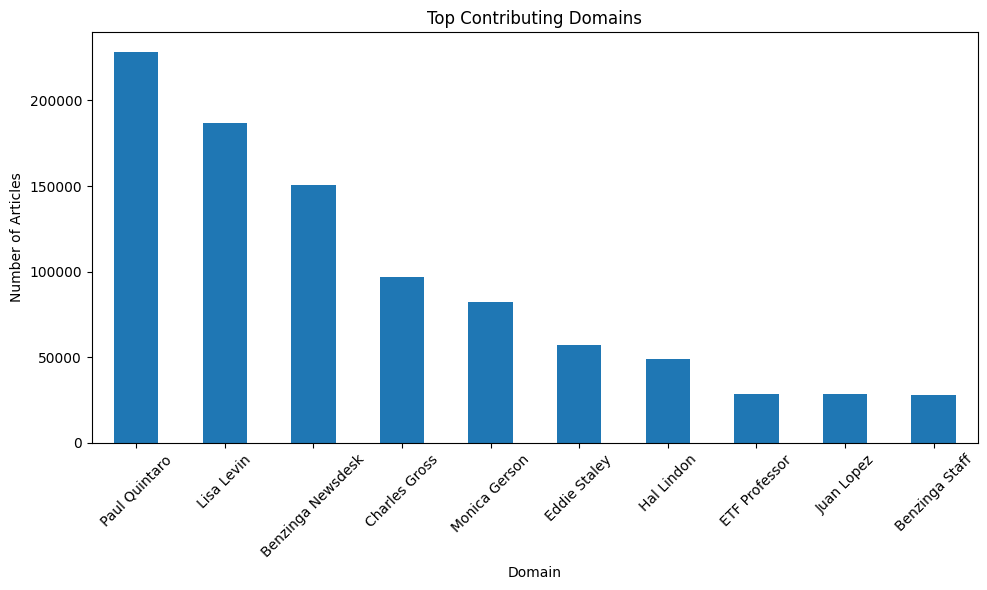

In [22]:
# Plot top domains
pa.plot_top_domains()

In [23]:
# Identify articles mentioning "earnings" or "profit"
mention_count = pa.identify_earnings_mentions()
print(f"\nNumber of articles mentioning 'earnings' or 'profit': {mention_count}")


Number of articles mentioning 'earnings' or 'profit': 96748


In [24]:
# Compare earnings mentions by publisher
earnings_by_pub = pa.earnings_by_publisher()
print("\nEarnings mentions by publisher:\n", earnings_by_pub.head(10))


Earnings mentions by publisher:
 publisher
ABNNewswire           1
Aaron Jackson.Ed      1
Abe Raymond          13
Abhi Rao              5
Adam Parker           1
Alex Biles            1
Alex Cho             15
Alex Furno          177
Alex Oleinic          8
Alex Shek            32
dtype: int64


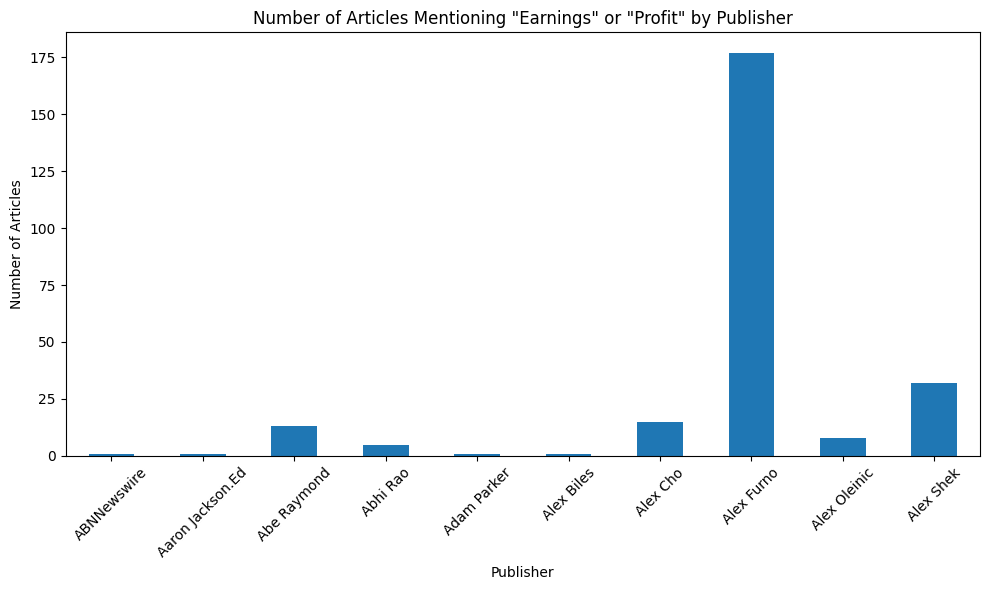

In [25]:
# Plot top publishers for earnings mentions
pa.plot_earnings_by_publisher()

### Time Series Analysis

In [35]:
from src.eda.time_series_analysis import TimeSeriesAnalysis

In [37]:
# Create an instance of the time series analysis class
tsa = TimeSeriesAnalysis(df)

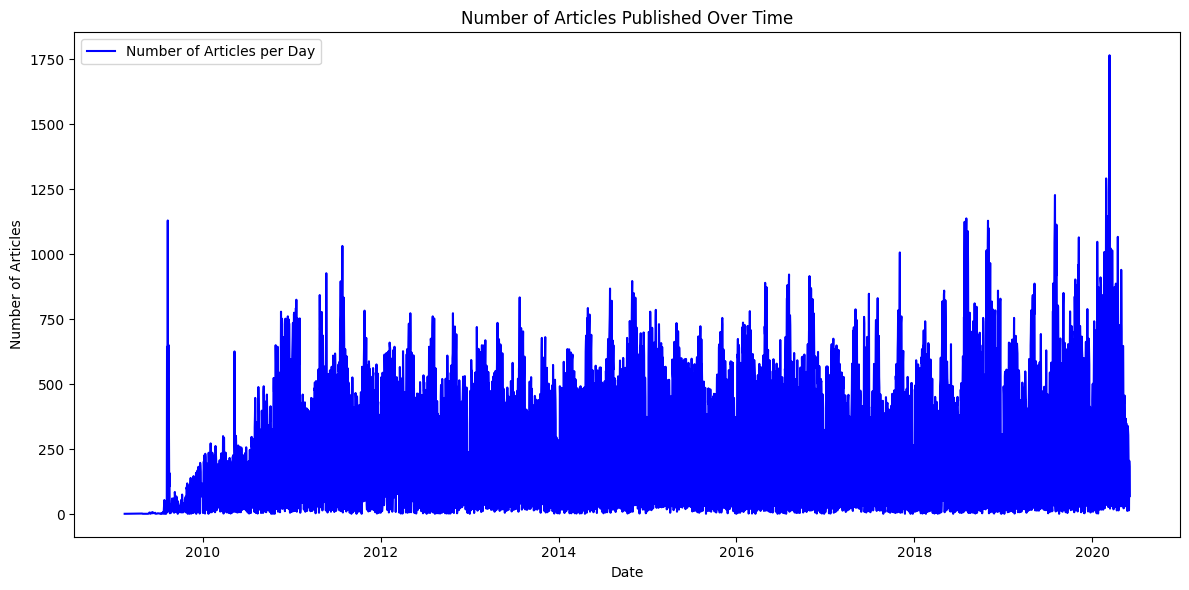

In [33]:
# Plot number of articles per day
tsa.plot_articles_over_time()

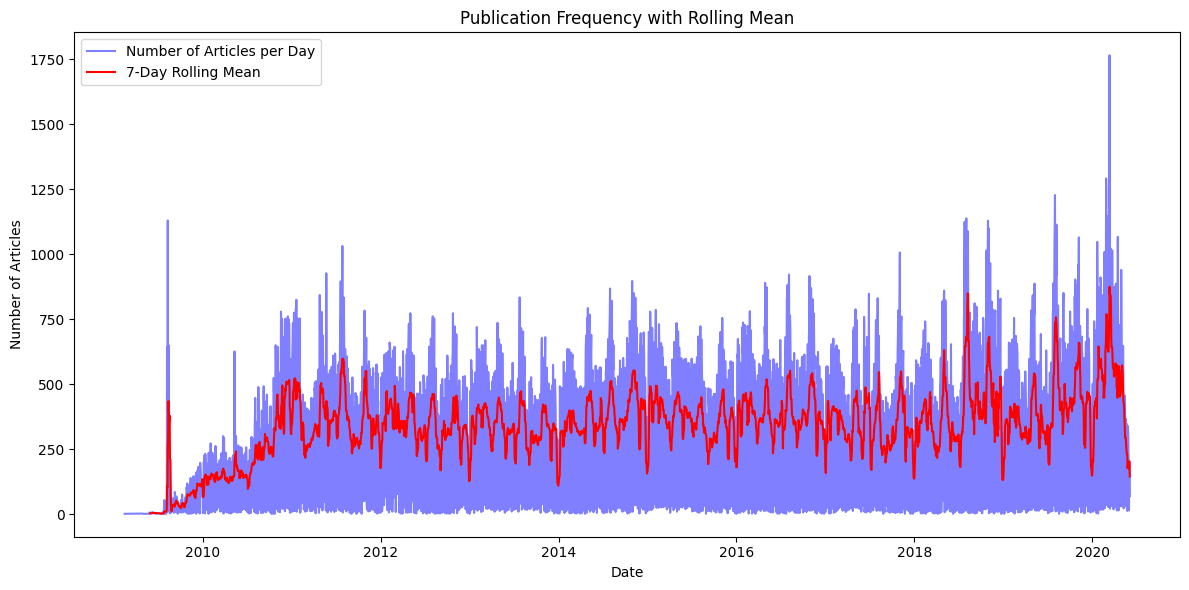

In [38]:
# Plot rolling mean to identify spikes
tsa.plot_rolling_mean(window=7)

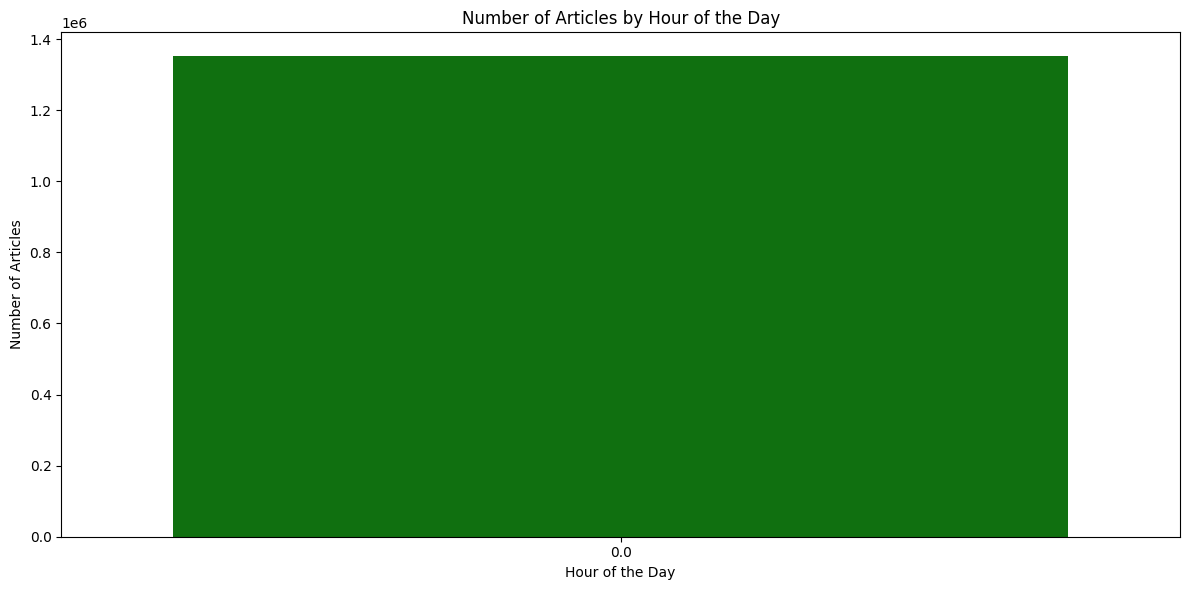

In [39]:
# Plot number of articles by hour of the day
tsa.plot_articles_by_hour()